## AI기반 챗봇 및 OCR 개발 전문가 과정

### 교과목명 : Vision
- 평가일 : 24. 3. 28
- 성명 : 한정현
- 점수 :

fashion_mnist 데이터셋을 불러와서 분류 모델링을 수행한 결과 과적합 발생 및 성능 개선이 필요하다고 판단된다. 아래 사항을 실행하여 과적합 발생과 성능 확인 후 Q1 ~ Q2 문제를 풀어보세요.




4422102/4422102 [==============================] - 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


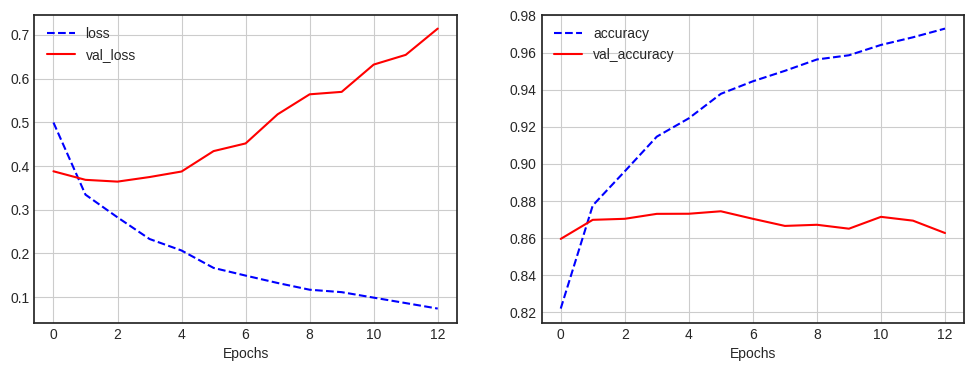

In [1]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
from keras import Model
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, SpatialDropout2D, Flatten, Reshape, Input
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from keras.datasets.fashion_mnist import load_data
from keras.preprocessing.image import ImageDataGenerator

(x_train,y_train),(x_test,y_test) = load_data()
x_train = x_train[...,np.newaxis] # 이미지 데이터에 채널 차원이 명시적으로 없는 경우(예: (28, 28) 크기의 MNIST 이미지) 채널 차원을 추가하기 위해 사용
x_test = x_test[...,np.newaxis]

x_train = x_train/255.
x_test = x_test/255.


class_names = ['T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

# 모델 구성 및 컴파일
def build_model():
  # model=Sequential()
  input = Input(shape=(28,28,1))
  output = Conv2D(filters=32,kernel_size=(3,3))(input)
  output = Conv2D(filters=64,kernel_size=(3,3))(output)
  output = Conv2D(filters=64,kernel_size=(3,3))(output)
  output = Flatten()(output)
  output = Dense(128, activation='relu')(output)
  output = Dense(64, activation='relu')(output)
  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output) # 모델이 하나 이상의 입력을 받을 수 있으며 출력은 단일 출력을 함.

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  return model

model_1 = build_model()

# ModelCheckpoint 콜백 설정
model_checkpoint = ModelCheckpoint(
    'best_model.h5', # 모델 파일 경로
    monitor='val_loss', # 모니터링 대상 성능 지표
    verbose=0, # 로그를 출력
    save_best_only=True, # 가장 좋은 모델만 저장
)

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss', # 모니터링 대상 성능 지표
    patience=10, # 성능 개선이 없는 에폭을 몇 번까지 허용할지 설정
    verbose=0, # 로그를 출력
)

# 학습 실행
hist_1 = model_1.fit(
    x_train, y_train,
    epochs=40,
    validation_split=0.3,
    batch_size=128,
    verbose=0,
    callbacks=[model_checkpoint, early_stopping] # 콜백 리스트에 추가
)

hist_1.history.keys()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_1.history['loss'],'b--',label='loss')
plt.plot(hist_1.history['val_loss'],'r',label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_1.history['acc'],'b--',label='accuracy')
plt.plot(hist_1.history['val_acc'],'r',label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [2]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7578 - acc: 0.8602


[0.7577718496322632, 0.8601999878883362]

Q1. 상기 모델에서 과적합을 줄이기 위하여 파라미터 수를 감소시키는 모델 구성으로 보완하고 시각화하세요.

In [3]:
def build_model2():
  input = Input(shape=(28,28,1))
  output = Conv2D(filters=32,kernel_size=(3,3))(input)
  output = MaxPooling2D(strides=(2,2))(output)
  output = Conv2D(filters=64,kernel_size=(3,3))(output)
  output = Dropout(0.4)(output)
  output = MaxPooling2D(strides=(2,2))(output)
  output = Conv2D(filters=64,kernel_size=(3,3))(output)
  output = Dropout(0.4)(output)
  output = MaxPooling2D(strides=(2,2))(output)
  output = Flatten()(output)
  output = Dense(128, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(64, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  return model

model_2 = build_model2()

model_checkpoint = ModelCheckpoint(
    'best_model2.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
)

hist_2 = model_2.fit(
    x_train, y_train,
    epochs=40,
    validation_split=0.3,
    batch_size=128,
    callbacks=[model_checkpoint, early_stopping]
)

Epoch 1/40
329/329 [==============================] - ETA: 0s - loss: 1.1614 - acc: 0.5684
Epoch 1: val_loss improved from inf to 0.71626, saving model to best_model2.h5
329/329 [==============================] - 6s 9ms/step - loss: 1.1614 - acc: 0.5684 - val_loss: 0.7163 - val_acc: 0.7468
Epoch 2/40
323/329 [============================>.] - ETA: 0s - loss: 0.7310 - acc: 0.7367
Epoch 2: val_loss improved from 0.71626 to 0.61734, saving model to best_model2.h5
329/329 [==============================] - 3s 8ms/step - loss: 0.7305 - acc: 0.7368 - val_loss: 0.6173 - val_acc: 0.7717
Epoch 3/40
325/329 [============================>.] - ETA: 0s - loss: 0.6607 - acc: 0.7630
Epoch 3: val_loss improved from 0.61734 to 0.55626, saving model to best_model2.h5
329/329 [==============================] - 4s 13ms/step - loss: 0.6599 - acc: 0.7633 - val_loss: 0.5563 - val_acc: 0.7951
Epoch 4/40
325/329 [============================>.] - ETA: 0s - loss: 0.6088 - acc: 0.7813
Epoch 4: val_loss did not i

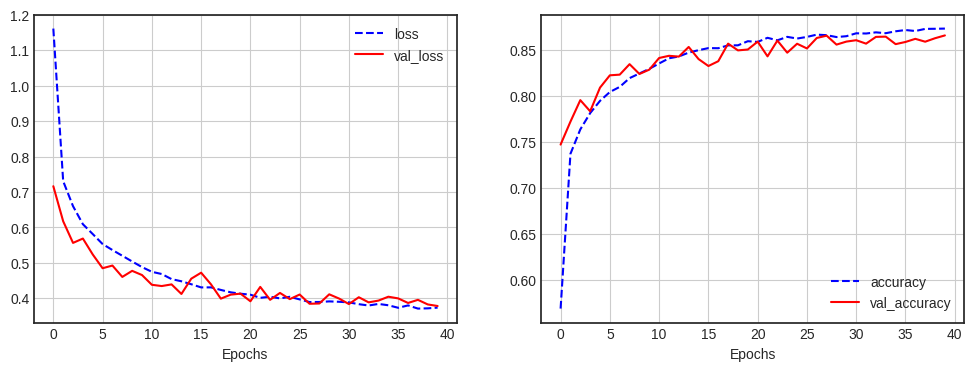

In [4]:
hist_2.history.keys()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_2.history['loss'],'b--',label='loss')
plt.plot(hist_2.history['val_loss'],'r',label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_2.history['acc'],'b--',label='accuracy')
plt.plot(hist_2.history['val_acc'],'r',label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [5]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.3946 - acc: 0.8593


[0.3945813477039337, 0.8593000173568726]

Q2. 상기 모델에서 레이어를 추가하여 모델 성능을 개선하세요.

In [6]:
def build_model3():
  input = Input(shape=(28,28,1))
  output = Conv2D(filters=64,kernel_size=3, activation='relu', padding='same')(input)
  output = BatchNormalization()(output)
  output = Conv2D(filters=64,kernel_size=3, activation='relu', padding='valid')(output)
  output = Dropout(0.5)(output)
  output = MaxPooling2D(strides=(2,2))(output)

  output = Conv2D(filters=128,kernel_size=3, activation='relu', padding='same')(input)
  output = BatchNormalization()(output)
  output = Conv2D(filters=128,kernel_size=3, activation='relu', padding='valid')(output)
  output = Dropout(0.5)(output)
  output = MaxPooling2D(strides=(2,2))(output)

  output = Conv2D(filters=256,kernel_size=3, activation='relu', padding='same')(input)
  output = BatchNormalization()(output)
  output = Conv2D(filters=256,kernel_size=3, activation='relu', padding='valid')(output)
  output = Dropout(0.5)(output)
  output = MaxPooling2D(strides=(2,2))(output)

  output = Flatten()(output)
  output = Dense(512, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(256, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  return model

model_3 = build_model3()

model_checkpoint = ModelCheckpoint(
    'best_model3.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
)

hist_3 = model_3.fit(
    x_train, y_train,
    epochs=40,
    validation_split=0.3,
    batch_size=128,
    callbacks=[model_checkpoint, early_stopping]
)

Epoch 1/40
329/329 [==============================] - ETA: 0s - loss: 0.8249 - acc: 0.7710
Epoch 1: val_loss improved from inf to 2.29437, saving model to best_model3.h5
329/329 [==============================] - 35s 91ms/step - loss: 0.8249 - acc: 0.7710 - val_loss: 2.2944 - val_acc: 0.0975
Epoch 2/40
328/329 [============================>.] - ETA: 0s - loss: 0.3696 - acc: 0.8704
Epoch 2: val_loss improved from 2.29437 to 0.48098, saving model to best_model3.h5
329/329 [==============================] - 25s 77ms/step - loss: 0.3695 - acc: 0.8704 - val_loss: 0.4810 - val_acc: 0.8887
Epoch 3/40
328/329 [============================>.] - ETA: 0s - loss: 0.3060 - acc: 0.8917
Epoch 3: val_loss improved from 0.48098 to 0.26958, saving model to best_model3.h5
329/329 [==============================] - 25s 77ms/step - loss: 0.3059 - acc: 0.8917 - val_loss: 0.2696 - val_acc: 0.9049
Epoch 4/40
328/329 [============================>.] - ETA: 0s - loss: 0.2694 - acc: 0.9041
Epoch 4: val_loss impr

In [7]:
model_3.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2728 - acc: 0.9239


[0.2728140354156494, 0.9239000082015991]

Q3. 사전 훈련된 모델 vgg19를 이용해 dog.jpg 분류 작업을 수행하세요.

In [8]:
!wget -O dog.jpg https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg

--2024-03-28 00:52:57--  https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg
Resolving www.publicdomainpictures.net (www.publicdomainpictures.net)... 172.67.1.236, 104.20.123.60, 104.20.122.60, ...
Connecting to www.publicdomainpictures.net (www.publicdomainpictures.net)|172.67.1.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88498 (86K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  86.42K  --.-KB/s    in 0.001s  

2024-03-28 00:52:57 (61.7 MB/s) - ‘dog.jpg’ saved [88498/88498]



In [9]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
vgg_net = VGG19(include_top=True, weights='imagenet',
                input_tensor=None, input_shape=None,
                pooling=None, classes=1000)

574710816/574710816 [==============================] - 25s 0us/step


35363/35363 [==============================] - 0s 1us/step
[[('n02088364', 'beagle', 0.8384029), ('n02089973', 'English_foxhound', 0.08918256), ('n02089867', 'Walker_hound', 0.06241605), ('n02088238', 'basset', 0.0046146587), ('n02088632', 'bluetick', 0.0033749717)]]


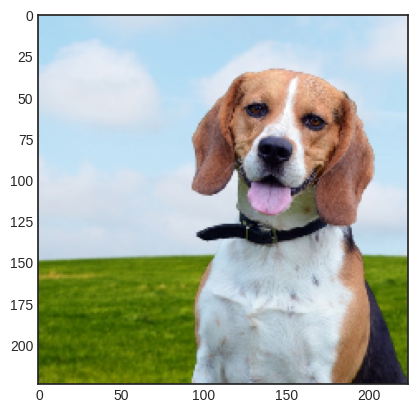

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
img = tf.keras.preprocessing.image.load_img('dog.jpg', target_size=(224,224))
plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)
preds = vgg_net.predict(x)
print(decode_predictions(preds))

Q4. matplotlib을 이용해서 아래와 같이 웹에서 이미지 파일을 가져와서 출력할 수 있다. 다음 사항을 수행하세요.
- matplotlib 대신에 cv2를 사용하여 이미지를 출력하세요.
- urlretrieve와 cv2.imread를 이용해서 이미지를 읽어와서 출력하세요

<ipython-input-22-9e8b64a1ca47>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(url)


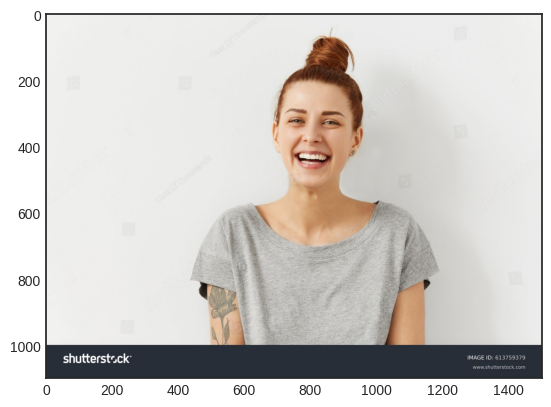

In [22]:
import imageio
from matplotlib import pyplot as plt

# 이미지 URL
url = 'https://image.shutterstock.com/z/stock-photo-happy-cheerful-young-woman-wearing-her-red-hair-in-bun-rejoicing-at-positive-news-or-birthday-gift-613759379.jpg'

# imageio를 사용하여 URL에서 이미지 직접 로드
img = imageio.imread(url)

# 이미지 표시
plt.imshow(img)
plt.show()

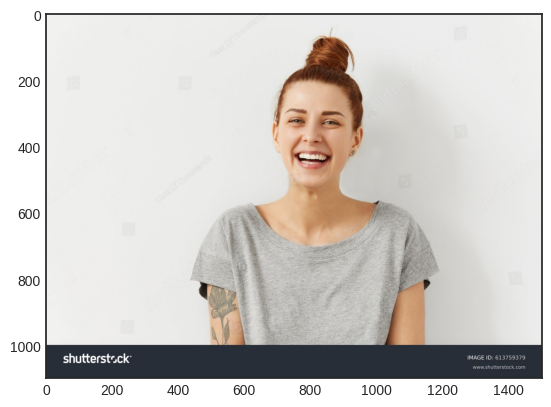

In [24]:
# urlretrieve와 cv2.imread를 이용해서 이미지를 읽어와서 출력
import urllib.request as req
import cv2

req.urlretrieve(url, 'lady.png')
img = cv2.imread('lady.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

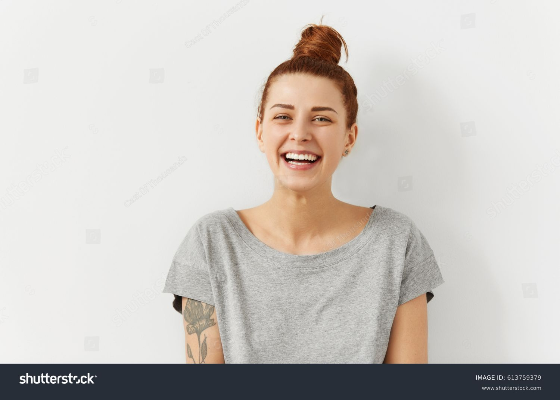

In [31]:
# matplotlib 대신에 cv2를 사용하여 이미지를 출력
from google.colab.patches import cv2_imshow
img = cv2.imread('lady.png')
img = cv2.resize(img, (560,400))
cv2_imshow(img)

Q5. family.jpg 이미지를 가져와서 정면얼굴 부분만 모자익 처리해서 출력하세요.

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


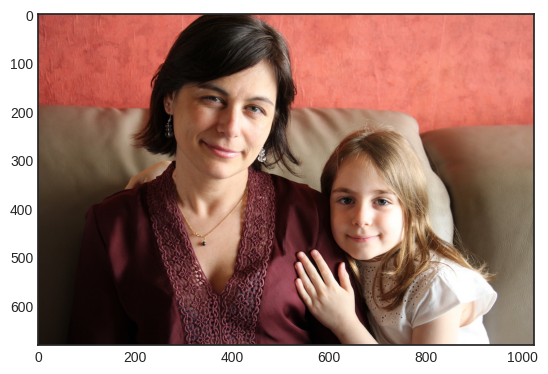

In [18]:
# family.jpg 이미지 확인
img = cv2.imread("/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m8_vision/data/family.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
def mosaic(img, rect, size):
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

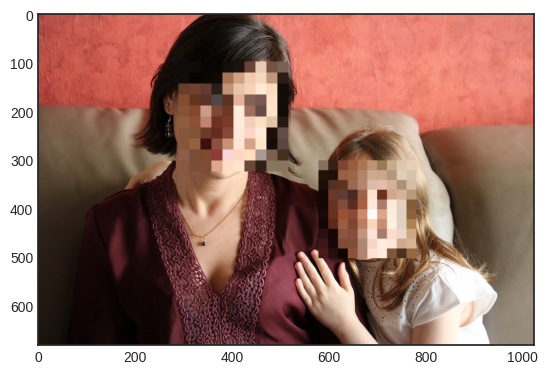

In [21]:
cascade_file = "/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m8_vision/data/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()

for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

cv2.imwrite("/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m8_vision/data/family-mosaic.jpg", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 출력용 텍스트
#
#
#
#
#
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
##
#
#
#